In [1]:
import numpy as np
# Generate data
n_features = 1
n_samples = 1000
X = np.random.normal(size=[n_samples, n_features])
y_regr = ( - 3 * X).reshape(-1)
z = 1 / (1 + np.exp(-y_regr))
y_clas = [np.random.choice(2, p = [1 - z[t], z[t]]) for t in range(n_samples)]


In [2]:
from sklearn.linear_model import SGDClassifier
xaxis = np.arange(min(X),max(X),0.1)
import matplotlib.pyplot as plt
k = 1
for loss in ['log_loss', 'perceptron', 'squared_error']:
    model = SGDClassifier(loss=loss)
    model.fit(X, y_clas)
    y = model.predict(xaxis.reshape(-1,1))
    plt.subplot(1, 3, k)
    plt.hist(X.reshape(-1)[np.array(y_clas)==0], alpha=0.5, density=True)
    plt.hist(X.reshape(-1)[np.array(y_clas)==1], alpha=0.5, density=True)
    plt.plot(xaxis, y, 'r')
    plt.title(loss)
    k+=1

ValueError: The loss log_loss is not supported. 

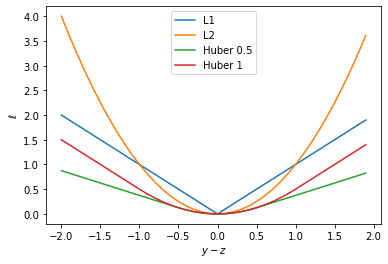

In [12]:
# Loss functions
x = np.arange(-2,2, 0.1)
def L1loss(x):
    return np.abs(x)
def L2loss(x):
    return x**2
def Huber(x, delta):
    r = np.abs(x) < delta
    return (0.5*r*x**2 + (1 - r)* delta * (np.abs(x) - 0.5 * delta))
plt.plot(x, L1loss(x))
plt.plot(x, L2loss(x))
plt.plot(x, Huber(x,0.5))
plt.plot(x, Huber(x,1))
plt.xlabel("$y - z$")
plt.ylabel("$\ell$")
plt.legend(["L1", "L2", "Huber 0.5", "Huber 1"])
plt.savefig("reg_loss_functions.pdf")

/tmp/ipykernel_277990/1005687177.py:8: RuntimeWarning: divide by zero encountered in log
  return -np.log(x)


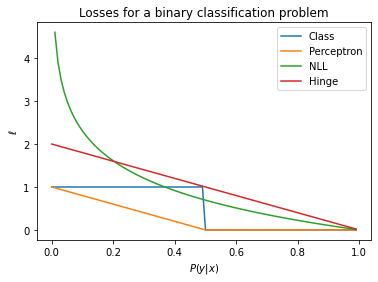

In [25]:
# Loss functions
x = np.arange(0,1, 0.01)
def ClassLoss(x):
    return (x < 1/2)
def PerceptronLoss(x):
    return 2*(x < 1/2) * (1/2 - x)
def NegativeLogLoss(x):
    return -np.log(x)
def HingeLoss(x):
    return 2*(1 - x)

plt.plot(x, ClassLoss(x))
plt.plot(x, PerceptronLoss(x))
plt.plot(x, NegativeLogLoss(x))
plt.plot(x, HingeLoss(x))
plt.xlabel("$P(y|x)$")
plt.ylabel("$\ell$")
plt.legend(["Class", "Perceptron", "NLL", "Hinge"])
plt.title("Losses for a binary classification problem")
plt.savefig("class_loss_functions.pdf")
